In [183]:
dataset=pd.read_csv(r'C:\Users\saran\Documents\INEURON\MACHINE_LEARNING\clustering-20201009T085837Z-001\clustering\Mall_Customers.csv')

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans
from sklearn.metrics import homogeneity_score,jaccard_score,silhouette_score
plt.style.use('fivethirtyeight')
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram,linkage

In [185]:
x = dataset.iloc[:,2:]
x
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X = MinMaxScaler().fit_transform(x)
X

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

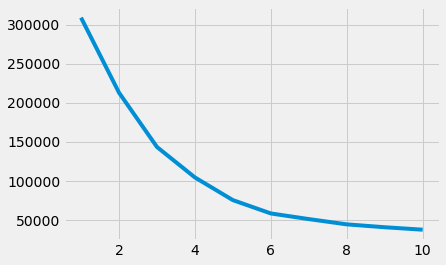

In [186]:
label = []
sse = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=23)
    km.fit_predict(x)
    sse.append(km.inertia_)
    label.append(km.labels_)
    
plt.plot(range(1,11),sse)

In [187]:
km = KMeans(n_clusters=6,random_state=87)
l = km.fit_predict(x)

In [190]:
x['label'] = km.labels_
x

,Age,Annual Income (k$),Spending Score (1-100),label
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,0
197,32,126,74,2
198,32,137,18,0


In [191]:
x.drop(['label'],axis=1,inplace=True)

In [192]:
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [193]:
dist_mat = distance_matrix(x,x)
# dist_mat = cdist(x,x)
dist_mat

array([[  0.        ,  42.04759208,  33.03028913, ..., 117.1110584 ,
        124.47489707, 130.15759678],
       [ 42.04759208,   0.        ,  75.01333215, ..., 111.7631424 ,
        137.74614332, 122.34786471],
       [ 33.03028913,  75.01333215,   0.        , ..., 129.87686476,
        122.18428704, 143.77065069],
       ...,
       [117.1110584 , 111.7631424 , 129.87686476, ...,   0.        ,
         57.07013229,  14.35270009],
       [124.47489707, 137.74614332, 122.18428704, ...,  57.07013229,
          0.        ,  65.03076195],
       [130.15759678, 122.34786471, 143.77065069, ...,  14.35270009,
         65.03076195,   0.        ]])

In [194]:
link = linkage(dist_mat,'single')

<ipython-input-194-46a7780a707e>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist_mat,'single')


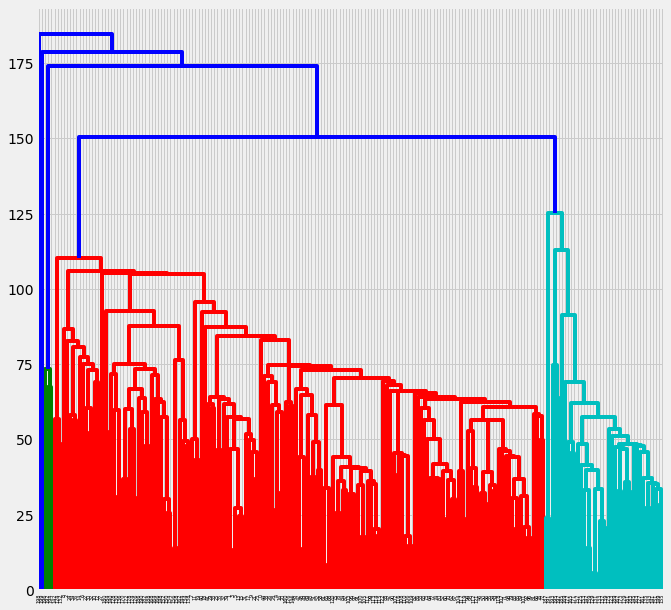

In [195]:
plt.figure(figsize=(10,10))
a = dendrogram(link)

In [232]:
clust = AgglomerativeClustering(n_clusters=5,linkage='complete')
clust.fit(x)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [233]:
dataset['label'] = clust.labels_

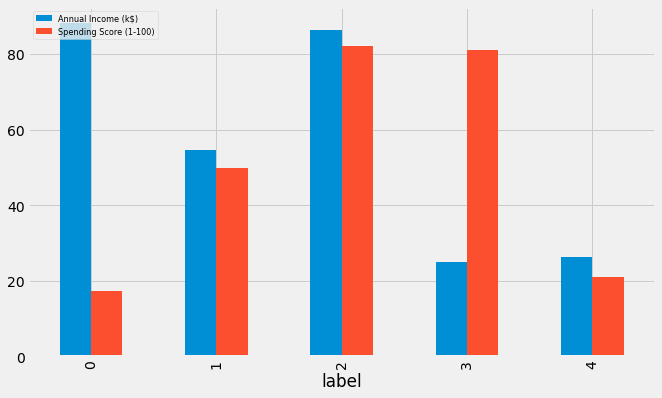

In [234]:

g = dataset.groupby(['label'])[['Annual Income (k$)','Spending Score (1-100)']].mean()
g.plot.bar(figsize=(10,6))
plt.legend(loc='upper left',fontsize = 'xx-small')

In [269]:
a = dataset[(dataset['label']==2) | (dataset['label']==3) | (dataset['label']==1)]
a.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3


In [241]:
dataset.groupby(['label']).count()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
label,,,,,
0,35,35,35,35,35
1,83,83,83,83,83
2,39,39,39,39,39
3,20,20,20,20,20
4,23,23,23,23,23


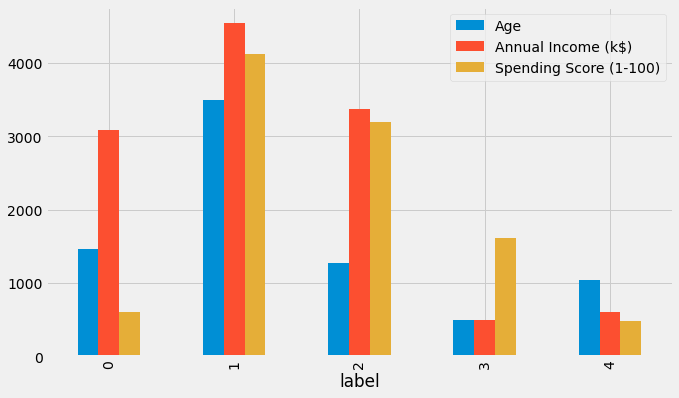

In [257]:
dataset.groupby(['label']).aggregate('sum')[['Age','Annual Income (k$)','Spending Score (1-100)']].plot.bar(figsize=(10,6))

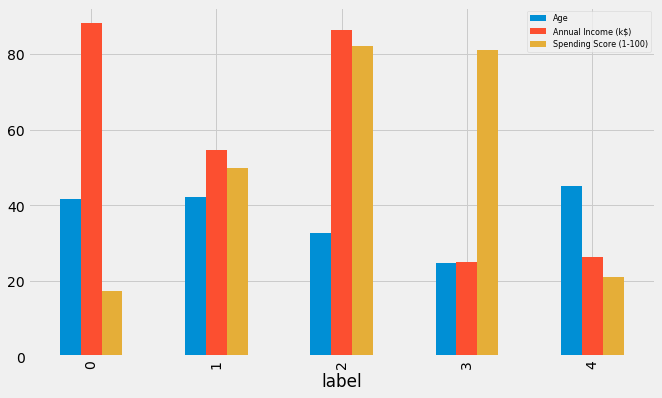

In [263]:
dataset.groupby(['label']).aggregate('mean')[['Age','Annual Income (k$)','Spending Score (1-100)']].plot.bar(figsize=(10,6))
plt.legend(loc='upper right',fontsize=8)